# Aim of this notebook

- How to analyse tweets
- How to do sentiment analysis
- How to make a wordcloud

# About the data

Dataset consists of tweets on Trump.


# About this Notebook

- <a href =#1> 1. Importing packages and libraries  </a>
- <a href =#2> 2. Reading the data </a>
- <a href =#3> 3. Handling null values </a>
- <a href =#4> 4. Exploratory data analysis </a>
- <a href =#5> 5. Cleaning the data </a>
- <a href =#6> 6. Applying data cleaning steps to data</a>
- <a href =#7> 7. Finding the most Common words in our Text</a>
- <a href =#8> 8.  Finding Most common words Sentiments Wise  </a>
    - <a href =#8.1> 8.1.  Finding the tweet sentiment</a>
    - <a href =#8.2> 8.2. Finding common words for positive sentiment tweets </a>
    - <a href =#8.3> 8.3. Finding the common words for negative sentiment tweets  </a>
    - <a href =#8.4> 8.4. Finding the common words for neutral sentiment tweets </a>
- <a href =#9> 9. Number of Unique Words in tweets of each type of sentiment  </a>
    - <a href =#9.1> 9.1. Number of unique words in tweets with positive sentiment </a>
    - <a href =#9.2> 9.2. Number of unique words in tweets with negative sentimen </a>
    - <a href =#9.3> 9.3. Number of unique words in tweets with neutral sentimen </a>
- <a href =#10> 10. Wordclouds  </a>
    - <a href =#10.1> 10.1.  WordCloud for neutral sentiment</a>
    - <a href =#10.2> 10.2.  WordCloud for positive sentiment</a>
    - <a href =#10.3> 10.3.  WordCloud for negative sentiment</a>

<br><br>
In case you are just starting with NLP here is a guide to Approach almost any NLP Problem by Grandmaster @Abhishek Thakur
https://www.slideshare.net/abhishekkrthakur/approaching-almost-any-nlp-problem


<b> This kernel is a work in Progress,and I will keep on updating it as I learn more and more</b>

**<span style="color:Red">If you find this kernel useful, Please Upvote it , it motivates me to write more Quality content**

<div id=1> <h2>  1. Importing packages and libraries  </h2> </div> 

In [2]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/trump-tweets/realdonaldtrump.csv
/kaggle/input/trump-tweets/trumptweets.csv


**Below is a helper Function which generates random colors which can be used to give different colors to your plots.Feel free to use it**

In [3]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

<div id=2> <h2> 2. Reading the Data  </h2></div> 

In [4]:
import pandas as pd
import numpy as np
train=pd.read_csv('/kaggle/input/trump-tweets/trumptweets.csv')


In [5]:
train

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN


In [6]:
print(train.shape)


(41122, 9)


So We have 27486 tweets in the train set and 3535 tweets in the test set

In [7]:
train.describe()

,id,retweets,favorites,geo
count,4.112200e+04,41122.000000,41122.000000,0.0
mean,6.088909e+17,5455.590657,22356.899105,NaN
std,3.027946e+17,10130.076661,41501.859711,NaN
min,1.698309e+09,0.000000,0.000000,NaN
25%,3.549428e+17,25.000000,28.000000,NaN
50%,5.609149e+17,291.000000,247.000000,NaN
75%,7.941218e+17,8778.000000,32970.750000,NaN
max,1.219077e+18,309892.000000,857678.000000,NaN


In [8]:
train.isna().sum()

id               0
link             0
content          0
date             0
retweets         0
favorites        0
mentions     18655
hashtags     35312
geo          41122
dtype: int64

Geo column has all values as nulls, hashtags have lot of null values, mentions also have lot of null values.

<div id=3> <h2> 3. Handling null values </h2> </div>

In [9]:
train['hashtags'].unique()

array([nan, '#', '#1', '# #', '#1 #', '# #1', '#01 #', '# #01', '# #Miss',
       '#10', '#103', '#2', '# # #', '#2013', '#3', '#CPAC2013', '#2016',
       '#19', '#for #', '# # # # #', '#9', '#sthash', '#2016 #',
       '# # # #', '# #2016', '#Oscars', '#2 #1', '#by', '# #2016 #',
       '#keepfighting #PresidentTrump', '#NothingWrongWithThat', '#No #',
       '#Donald', '# #sp', '#ixzz38mkekMMd', '#ixzz39oaWl9uE', '#sp',
       '#ixzz3EinGXgfV', '#TrumpForPresident', '#empirebuilding #',
       '#ixzz3FTIqRA2i', '#comments', '#12 #', '#ixzz3HY6z7b8R',
       '#disqus_thread', '#ixzz3HdgLJeEa', '#trumpforpresident',
       '#ixzz3I1Wq7WB1', '#t #', '#ixzz3IHR8pjc1', '#ixzz3IHQHR1Wf',
       '#ixzz3J3cUHFwI', '#pg29', '#pga', '# #1 #', '#ixzz3Lc3KeGLq',
       '# # #2016 #', '#8 #', '# #2016 # # # # # #', '#ixzz3Nn4nJGET',
       '# # # # # # #', '# # #1 #1', '#ixzz3OGoWg0rh', '#239016885',
       '#ixzz3P0Lgk7Io', '#emHE2Xd0wJ6tx2kl', '#RIVERS', '#storylink',
       '#56821933', '# # 

In [10]:
train['mentions'].unique()

array([nan, '@', '@9pm', ..., '@ @Jason2CD @ @', '@FEMA_Brock @ @',
       '@JennaEllisRives'], dtype=object)

1. hashtags: This column does not have something very significant for us to analyse. We have mostly words like #ixzz4 etc which make no sense and we wont be able to analyse their sentiment. So we can get rid of this column
2. mentions  too does not have anything siginificant for us to analyse. Hence we can do away with that too. Let us drop columns which dont have any siginificantly useful information.
3. geo anyways does not have any value, all values are null
4. mentions usually mention another person and we wont really get any sentiment by analysing that

In [11]:
train=train.drop(['link','mentions','hashtags','geo'], axis=1)

<div id=4> <h2> 4. EDA  </h2></div>

In [12]:
train.head()

,id,content,date,retweets,favorites
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868
1,1701461182,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24
4,1773561338,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965


Lets look at the distribution of reviews in the train set

<div id=5> <h2>5. Cleaning the data </h2> </div>

Let's first clean the data, remove stopwords etc and perform basic pre-processing

**Removing weird spaces**

In [13]:
def remove_spaces(text):
    text=text.strip()
    text=text.split()
    return ' '.join(text)
    

<b> Spelling Correction </b>

In [14]:
def edits1(word):
    letters='abcdefghijklmnopqrstuvwxyz'
    splits=[(word[:i], word[i:]) for i in range(len(word)+1)]
    deletes=[L+R[1:] for L,R in splits if R]
    transposes=[L+R[1] +R[0] + R[2:] for L,R in splits if len(R)>1]
    replaces = [L+c+R[1:] for L,R in splits if R for c in letters]
    inserts = [L+c+ R for L,R in splits for c in letters]
    return set(deletes+transposes+replaces+inserts)
def edits2(word):
    return(e2 for e1 in edits1(word) for e2 in edits1(e1))
            

<b> Contraction </b>

In [15]:
contraction = {'cause':'because',
              'aint': 'am not',
              'aren\'t': 'are not'}

def mapping_replacer(x,dic):
    for words in dic.keys():
        if ' ' + words + ' ' in x:
            x=x.replace(' '+ words +' ' ,' '+dic[words]+' ' )
    return x

    

<b> Stemming, lemmetisation and tokenisation
</b>

In [16]:
import nltk
nltk.download('punkit')
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer

nltk.LancasterStemmer
ls = LancasterStemmer()
lem = WordNetLemmatizer()
def lexicon_normalization(text):
    words = word_tokenize(text) 
    
    
    # 1- Stemming
    words_stem = [ls.stem(w) for w in words]
    
    # 2- Lemmatization
    words_lem = [lem.lemmatize(w) for w in words_stem]
    return words_lem

    

[nltk_data] Error loading punkit: Package 'punkit' not found in index


<b> Handling emojis </b>

In [17]:
import emoji
import re 
#from emot.emo_unicode import UNICODE_EMO
def convert_emojis(text):
    for emot in emoji.UNICODE_EMOJI:
        text = re.sub(r'('+emot+')', "_".join(emoji.UNICODE_EMOJI[emot].replace(",","").replace(":","").split()), text)
    return text

<b>Removing links, brackets, numbers, punctuations etc. </b>


In [18]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    
    return text

<b> Handling stopwords </b>

In [19]:
from collections import Counter
def remove_stopword(text):
    stop_words = stopwords.words('english')
    stopwords_dict = Counter(stop_words)
    text = ' '.join([word for word in text.split() if word not in stopwords_dict])
    return text

<b> Tokenisation </b>

In [20]:
def tokenise(text):
    words = word_tokenize(text) 
    return words


<div id = 6> <h2> 6. Applying data cleaning steps to data </h2> </div>

Cleaning Regex Expressions from data

In [21]:
import re
train['content'] = train['content'].map(lambda x: re.sub(r'\W+', ' ', x))
train['content'] = train['content'].replace(r'\W+', ' ', regex=True)


In [22]:
train.head()

,id,content,date,retweets,favorites
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868
1,1701461182,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18
3,1741160716,New Blog Post Celebrity Apprentice Finale and ...,2009-05-08 22:40:15,11,24
4,1773561338,My persona will never be that of a wallflower...,2009-05-12 16:07:28,1399,1965


In [23]:
train['content']=train['content'].apply(lambda x: mapping_replacer(x, contraction))

In [24]:
train['content'] = train['content'].apply(lambda x:clean_text(x))

In [25]:
train['content']=train['content'].apply(lambda x: remove_stopword(x))


In [26]:
train['content']=train['content'].apply(lambda x: lexicon_normalization(x))

In [27]:
train.head()

,id,content,date,retweets,favorites
0,1698308935,"[sur, tun, watch, donald, trump, lat, night, d...",2009-05-04 20:54:25,500,868
1,1701461182,"[donald, trump, appear, view, tomorrow, morn, ...",2009-05-05 03:00:10,33,273
2,1737479987,"[donald, trump, read, top, ten, fin, tip, lat,...",2009-05-08 15:38:08,12,18
3,1741160716,"[new, blog, post, celebr, appr, fin, lesson, l...",2009-05-08 22:40:15,11,24
4,1773561338,"[person, nev, wallflow, rath, build, wal, clin...",2009-05-12 16:07:28,1399,1965


<div id=7><h2>7. Finding the most Common words in our Text </h2></div>

In [28]:
top = Counter([item for sublist in train['content'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,realdonaldtrump,8741
1,com,8422
2,http,7138
3,trump,6472
4,gre,6444
5,thank,5134
6,twit,4770
7,u,3849
8,presid,3481
9,new,3268


In [29]:
blacklist = ['http','https','www','com', 'ev','u','ly','pic','would']

def remove_words(text):
    text = [i for i in text if (i not in blacklist)]
    return text

In [30]:
#train['content']=remove_words(train['content'])

train['content'] = train['content'].apply(lambda x: [i for i in x if i not in blacklist])

In [31]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [32]:
top = Counter([item for sublist in train['content'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,trump,6472
2,gre,6444
3,thank,5134
4,twit,4770
5,presid,3481
6,new,3268
7,stat,2864
8,peopl,2526
9,get,2487
10,donald,2334


In [33]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

<div id = 8><h2>8. Finding Most common words Sentiments Wise</h2></div>

Let's look at the most common words in different sentiments

<div id=8.1><h3>8.1 Finding the tweet sentiment </div></h3>

In [34]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

from textblob import TextBlob

def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(tweet) 
    
    # set sentiment 
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [35]:
train['sentiment']=train['content'].apply(lambda x: get_tweet_sentiment(' '.join(x)))

In [36]:
train.head()

,id,content,date,retweets,favorites,sentiment
0,1698308935,"[sur, tun, watch, donald, trump, lat, night, d...",2009-05-04 20:54:25,500,868,positive
1,1701461182,"[donald, trump, appear, view, tomorrow, morn, ...",2009-05-05 03:00:10,33,273,positive
2,1737479987,"[donald, trump, read, top, ten, fin, tip, lat,...",2009-05-08 15:38:08,12,18,positive
3,1741160716,"[new, blog, post, celebr, appr, fin, lesson, l...",2009-05-08 22:40:15,11,24,positive
4,1773561338,"[person, nev, wallflow, rath, build, wal, clin...",2009-05-12 16:07:28,1399,1965,neutral


In [37]:
Positive_sent = train[train['sentiment']=='positive']
Negative_sent = train[train['sentiment']=='negative']
Neutral_sent = train[train['sentiment']=='neutral']

<b> Overall tweet sentiment </b>

In [38]:
print('Number of tweets with positive sentiment', Positive_sent['sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['sentiment'].count())
print('Number of tweets with neutral sentiment', Neutral_sent['sentiment'].count())


Number of tweets with positive sentiment 15069
Number of tweets with negative sentiment 6756
Number of tweets with neutral sentiment 19297


<b><i>So we see that overall the tweets are neutral in nature, followed by positive sentiment for the time in which they are analysed.</i></b>

<div id=8.2><h3>8.2 Finding common words for positive sentiment tweets</div></h3>

In [39]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['content'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,realdonaldtrump,3011
1,gre,2651
2,new,2650
3,trump,2637
4,good,1593
5,thank,1563
6,win,1409
7,presid,1360
8,real,1304
9,twit,1170


Since we have words like 's', 'gre' which do not really mean anything, we will remove them and find the most common words

In [40]:
import numpy as np
top = Counter([item for sublist in Positive_sent['content'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(23))
temp_positive.columns = ['Common_words','count']
temp_positive['Common_words'] = temp_positive['Common_words'].map(lambda x: re.sub(r'\W+', '', x))
temp_positive['Common_words'] = temp_positive['Common_words'].replace(r'\W+', '', regex=True)
temp_positive['Common_words'] = temp_positive['Common_words'].apply(lambda x:remove_spaces(x))
temp_positive=temp_positive[~temp_positive['Common_words'].isin(['s','gre','“',' * '])] #new line removing meaningless words
mask1 = temp_positive.Common_words.str.contains('[a-zA-Z]')
mask2 = temp_positive.Common_words.notna()
temp_positive = temp_positive[mask1 | mask2]
temp_positive.Common_words =  temp_positive.Common_words.str.replace(r"\s+", "").replace("", np.NaN)
temp_positive=temp_positive.dropna()


temp_positive.style.background_gradient(cmap='Greens')


,Common_words,count
0,realdonaldtrump,3011
2,new,2650
3,trump,2637
4,good,1593
5,thank,1563
6,win,1409
7,presid,1360
8,real,1304
9,twit,1170
10,peopl,1141


In [41]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in Positive Sentiment tweets', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

<div id=8.3><h3>8.3 Finding the common words for negative sentiment tweets </div></h3>

In [42]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['content'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,gre,825
2,realdonaldtrump,774
3,trump,751
4,peopl,625
5,new,618
6,mad,614
7,presid,598
8,stat,555
9,get,546
10,fail,540


In [43]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['content'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(22))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']

#Data cleaning
temp_negative['Common_words'] = temp_negative['Common_words'].map(lambda x: re.sub(r'\W+', '', x))
temp_negative['Common_words'] = temp_negative['Common_words'].replace(r'\W+', '', regex=True)
temp_negative=temp_negative[~temp_negative['Common_words'].isin(['s','t'])] #new line removing meaningless words from above
#mask1 = temp_negative.Common_words.str.contains('[a-zA-Z]')
#mask2 = temp_negative.Common_words.notna()
#temp_negative = temp_negative[mask1 | mask2]

temp_negative.Common_words =  temp_negative.Common_words.replace("", np.nan)
temp_negative = temp_negative.dropna(subset=['Common_words'])

temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,gre,825
2,realdonaldtrump,774
3,trump,751
4,peopl,625
5,new,618
6,mad,614
7,presid,598
8,stat,555
9,get,546
10,fail,540


In [44]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Words in Negative Tweets')
fig.show()

<div id=8.4><h3>8.4 Finding the common words for neutral sentiment tweets </div></h3>

In [45]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['content'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,thank,3276
2,twit,3221
3,trump,3084
4,gre,2968
5,presid,1523
6,stat,1286
7,donald,1213
8,bit,1090
9,mak,914
10,americ,900


In [46]:

top = Counter([item for sublist in Neutral_sent['content'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']

#Data cleaning
temp_neutral['Common_words'] = temp_neutral['Common_words'].map(lambda x: re.sub(r'\W+', '', x))
temp_neutral['Common_words'] = temp_neutral['Common_words'].replace(r'\W+', '', regex=True)
temp_neutral=temp_neutral[~temp_neutral['Common_words'].isin(['s'])] #new line removing meaningless words from above

temp_neutral.Common_words =  temp_neutral.Common_words.replace("", np.nan)
temp_neutral = temp_neutral.dropna(subset=['Common_words'])

temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,thank,3276
2,twit,3221
3,trump,3084
4,gre,2968
5,presid,1523
6,stat,1286
7,donald,1213
8,bit,1090
9,mak,914
10,americ,900


In [47]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [48]:
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

<div id=9><h2>9. Number of Unique Words in tweets of each type of sentiment </h2> </div>

We will look at number of unique words in each type of tweet with different sentiments:
* Positive
* Negative
* Neutral

In [49]:
raw_text = [word for word_list in train['content'] for word in word_list]

In [50]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in train[train.sentiment != sentiment]['content']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train[train.sentiment == sentiment]['content']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

  <div id=9.1><h2>9.1. Number of unique words in tweets with positive sentiment  </h2> </div>

In [51]:
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,okay,16
1,sweet,14
2,joy,12
3,loyal,11
4,superb,10
5,dim,9
6,toyot,9
7,free,8
8,orl,8
9,woody,7


In [52]:
Unique_Positive

,words,count
0,okay,16
1,sweet,14
2,joy,12
3,loyal,11
4,superb,10
5,dim,9
6,toyot,9
7,free,8
8,orl,8
9,woody,7


In [53]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Words in Positive sentiment tweets')
fig.show()

In [54]:
import 
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique words in Positive sentiment tweets')
plt.show()

SyntaxError: invalid syntax (<ipython-input-54-c6cd8354e495>, line 1)

  <div id=9.2><h2>9.2. Number of unique words in tweets with negative sentiment  </h2> </div>

In [55]:
Unique_Negative= words_unique('negative', 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,blind,20
1,filthy,12
2,crap,11
3,weird,8
4,tempera,6
5,grief,6
6,puppy,5
7,refut,5
8,nadarkhan,4
9,blockbust,4


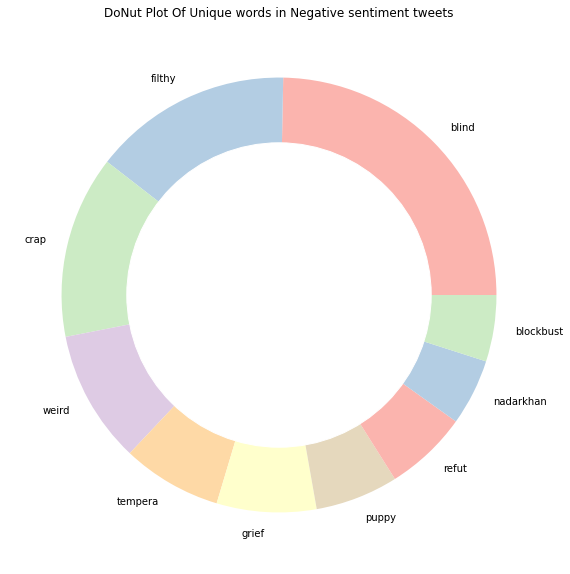

In [56]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'
plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique words in Negative sentiment tweets')
plt.show()

  <div id=9.3><h2>9.3. Number of unique words in tweets with neutral sentiments  </h2> </div>

In [57]:
Unique_Neutral= words_unique('neutral', 10, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Oranges')

The top 10 unique words in Neutral Tweets are:


,words,count
0,به,13
1,algemein,12
2,را,12
3,luv,11
4,ایران,10
5,wilmington,9
6,و,9
7,mason,8
8,premierecollect,8
9,roanok,8


Since the count for positive, negative and neutral sentiments is so less, there is no use of creating word clouds with unique words. So we will create a wordcloud with all the words combined.

In [66]:
#Data cleaning
Unique_Neutral= words_unique('neutral', 14, raw_text)
Unique_Neutral['words'] = Unique_Neutral['words'].map(lambda x: re.sub(r'\W+', '', x))
Unique_Neutral['words'] = Unique_Neutral['words'].replace(r'\W+', '', regex=True)
Unique_Neutral['words']=Unique_Neutral[~Unique_Neutral['words'].isin(['به','را','ایران','و'])] #new line removing meaningless words from above

Unique_Neutral['words'] =  Unique_Neutral['words'].replace("", np.nan)
Unique_Neutral= Unique_Neutral.dropna(subset=['words'])

Unique_Neutral.style.background_gradient(cmap='Reds')

,words,count
1,algemein,12
3,luv,11
5,wilmington,9
7,mason,8
8,premierecollect,8
9,roanok,8
10,jobsnotmob,8
11,autograph,7
12,thomasarobert,7
13,lauderd,7


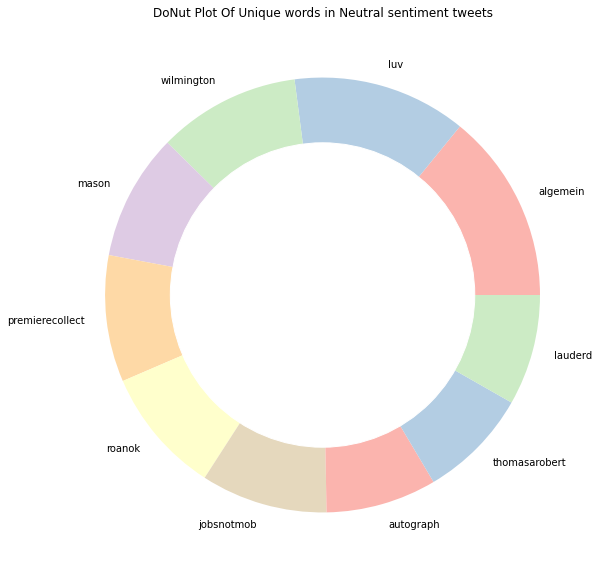

In [67]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Neutral['count'], labels=Unique_Neutral.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique words in Neutral sentiment tweets')
plt.show()

**By Looking at the Unique Words of each sentiment,we now have much more clarity about the data**

We shall now proceed to create word clouds, but we shall make word cloud of all words and not just existing words since unique words are very less in number for many sentiments (10,7,9 etc.) , so an effective word cloud can be only made by considering all the words in different sentiment tweets

<div id=10><h2>10. WordClouds</h2> </div>


We will be building three types of wordclouds:

* WordCloud of Neutral Tweets
* WordCloud of Positive Tweets
* WordCloud of Negative Tweets

In [68]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    
    wordcloud = WordCloud(background_color=color,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/kaggle/input/trump-tweets/'

<div id=10><h2>10.1. WordCloud for neutral sentiment</h2> </div>

In [69]:
Neutral_sent

,id,content,date,retweets,favorites,sentiment
4,1773561338,"[person, nev, wallflow, rath, build, wal, clin...",2009-05-12 16:07:28,1399,1965,neutral
5,1776419923,"[miss, tar, con, fir, alway, believ, second, c...",2009-05-12 21:21:55,27,26,neutral
7,1796477499,"[strive, whol, keep, sen, wond, intact, donald...",2009-05-14 18:30:40,18,25,neutral
8,1806258917,"[ent, think, lik, champ, sign, book, keychain,...",2009-05-15 16:13:13,14,8,neutral
9,1820624395,"[achiev, achiev, plateau, begin, donald, j, tr...",2009-05-17 00:22:45,20,48,neutral
...,...,...,...,...,...,...
41104,1218520880051105792,"[gre, day, whit, hous, nat, champ, lsu, tig, t...",2020-01-18 14:09:51,18014,99669,neutral
41108,1218668469597675520,"[approv, rat, republ, party, record, thank]",2020-01-18 23:56:19,22241,133899,neutral
41110,1218673508911403008,"[anoth, fak, book, two, third, rat, washington...",2020-01-19 00:16:21,22674,112349,neutral
41115,1218752661471793153,[twit],2020-01-19 05:30:52,20302,66943,neutral


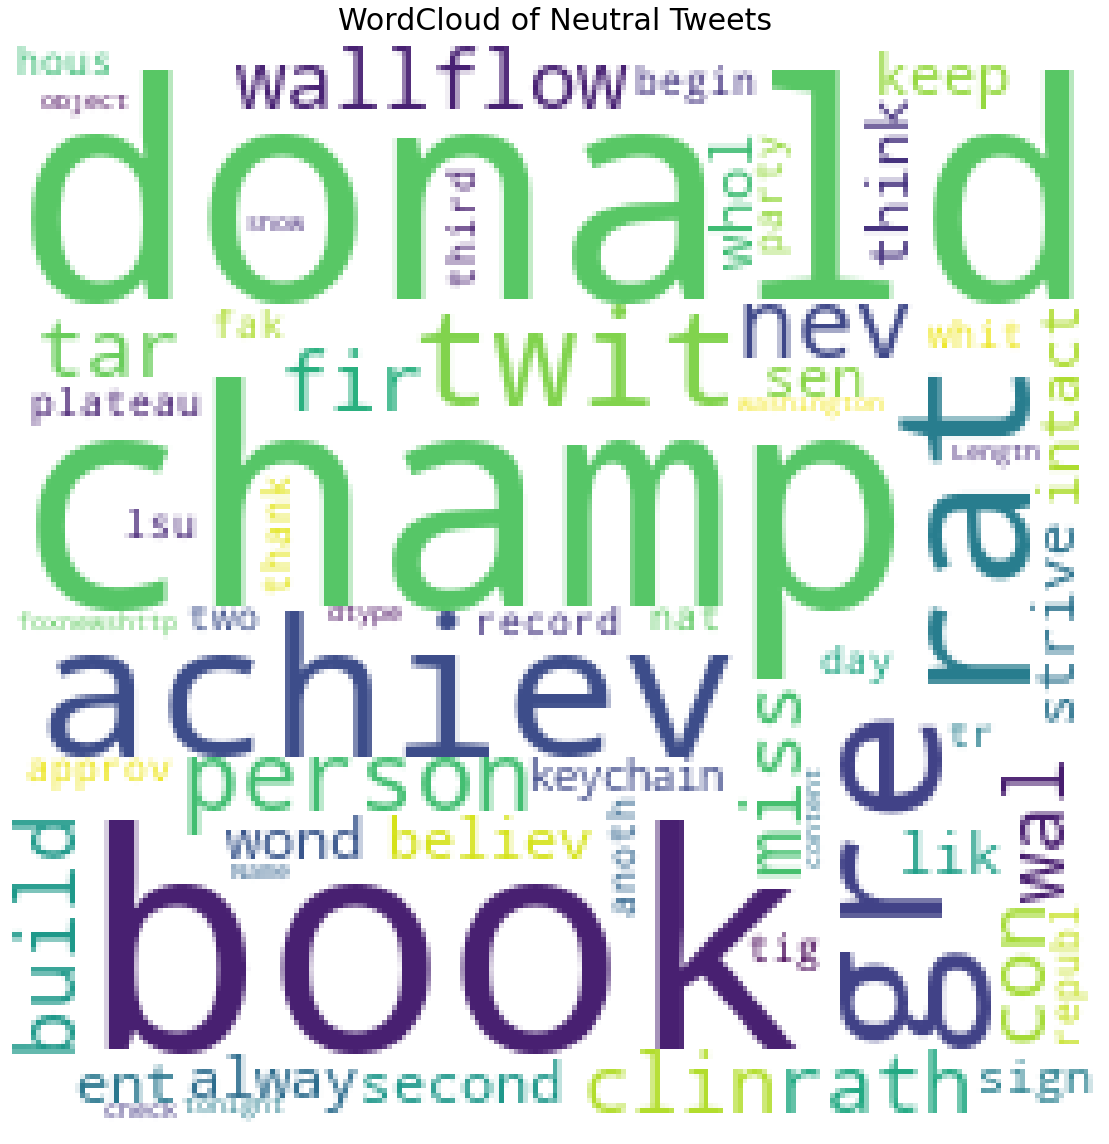

In [71]:
pos_mask = np.array(Image.open('/kaggle/input/tweet-mask/tweet_mask.png'))
plot_wordcloud(Neutral_sent.content,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of Neutral Tweets")

<div id=10.2><h2>10.2 WordCloud for positive sentiment</h2> </div>


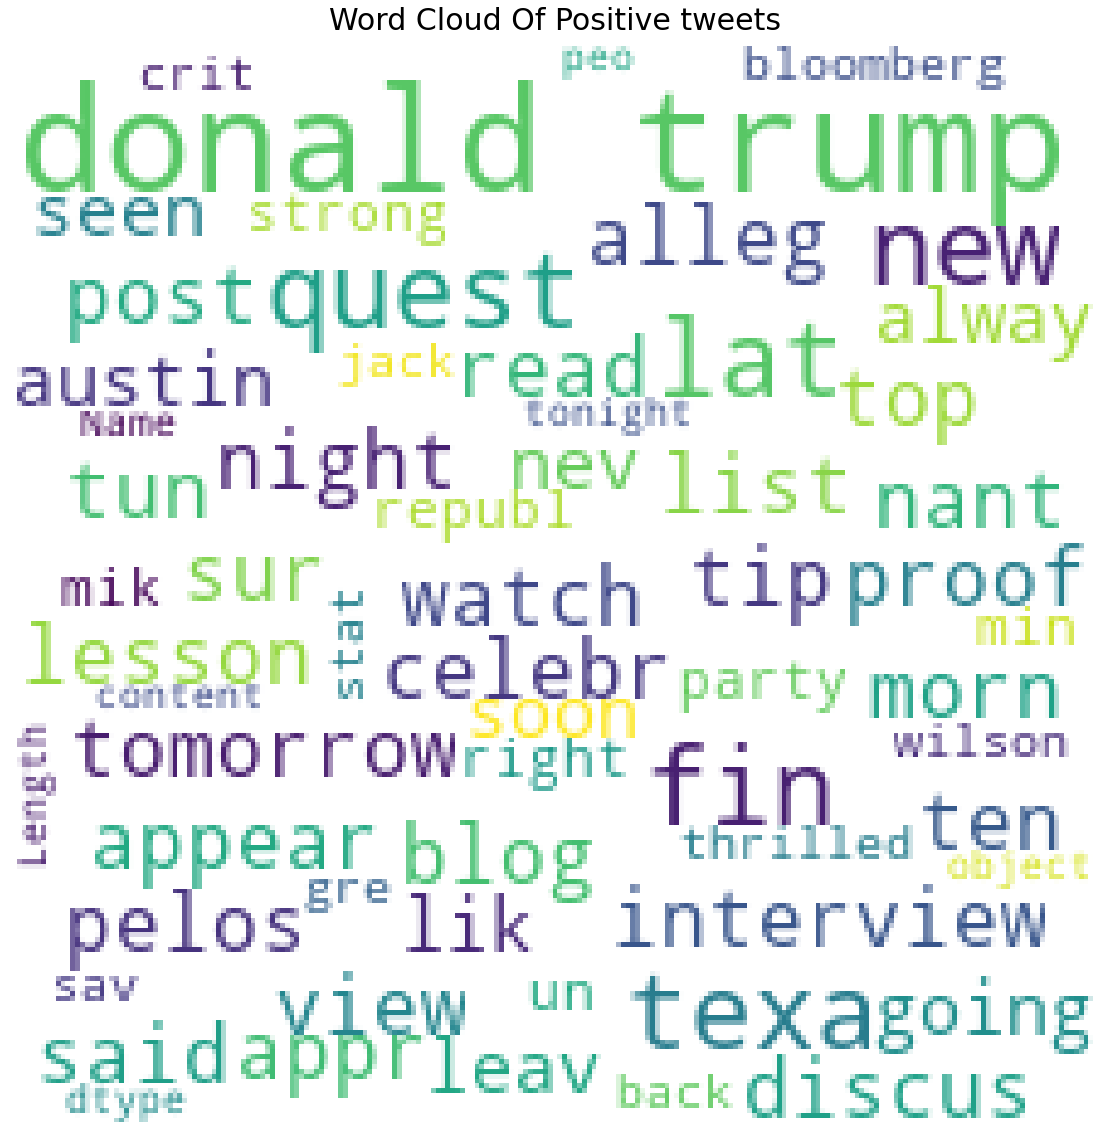

In [72]:
plot_wordcloud(Positive_sent.content,mask=pos_mask,title="Word Cloud Of Positive tweets",title_size=30)

<div id=10.3><h2>10.3 WordCloud for Tweets with negative sentiment</h2> </div>

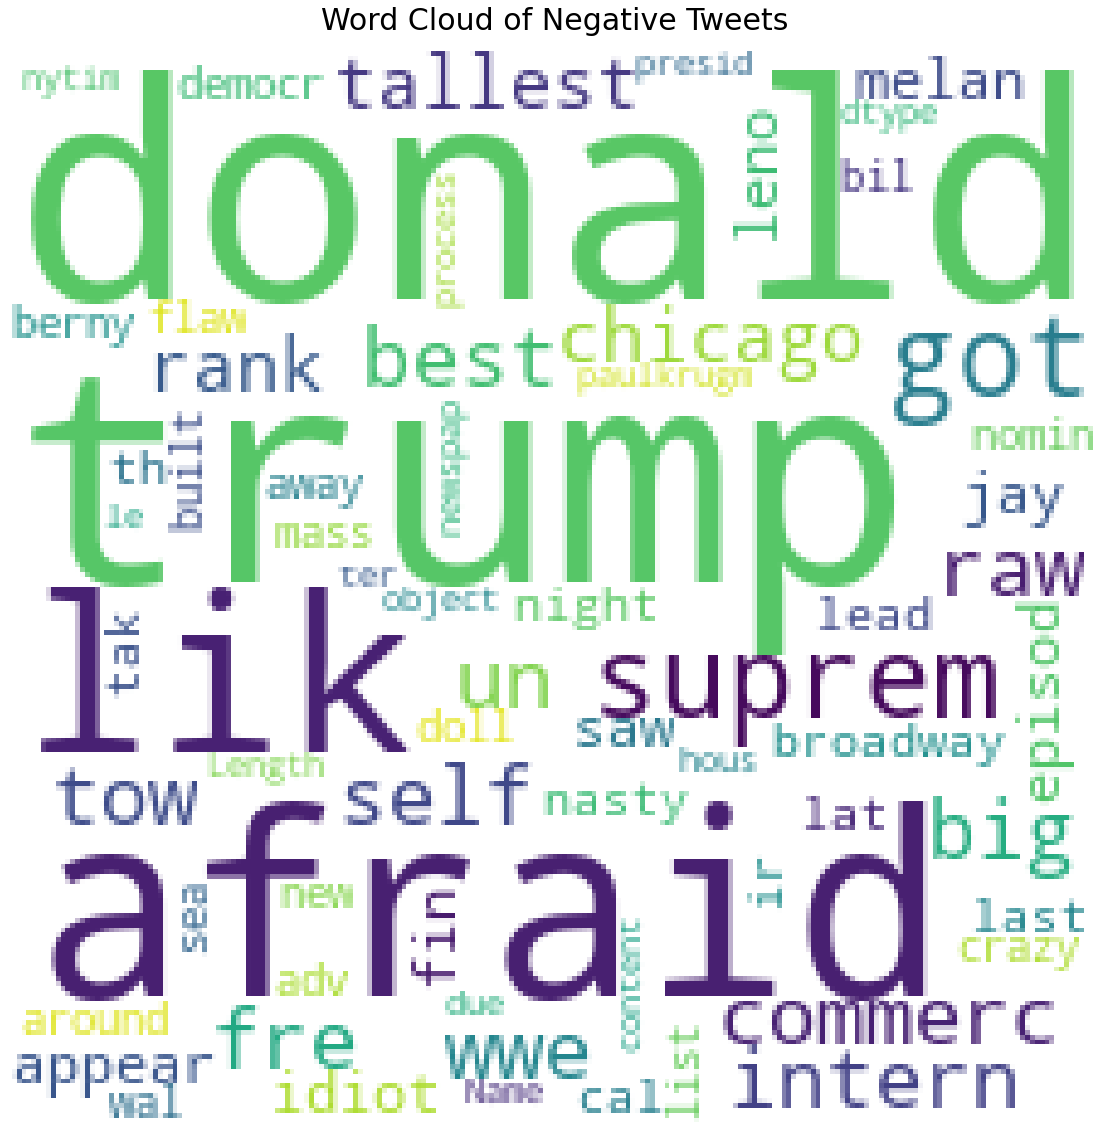

In [73]:
plot_wordcloud(Negative_sent.content,mask=pos_mask,title="Word Cloud of Negative Tweets",color='white',title_size=30)

<h4>If you liked my kernel, please be kind to upvote it :). It will help my efforts :)</h4>